In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:

dataDir=Path('/content/drive/MyDrive/ski/train')
annFile = Path('/content/drive/MyDrive/ski/train/_annotations.coco.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()



loading annotations into memory...
Done (t=0.73s)
creating index...
index created!


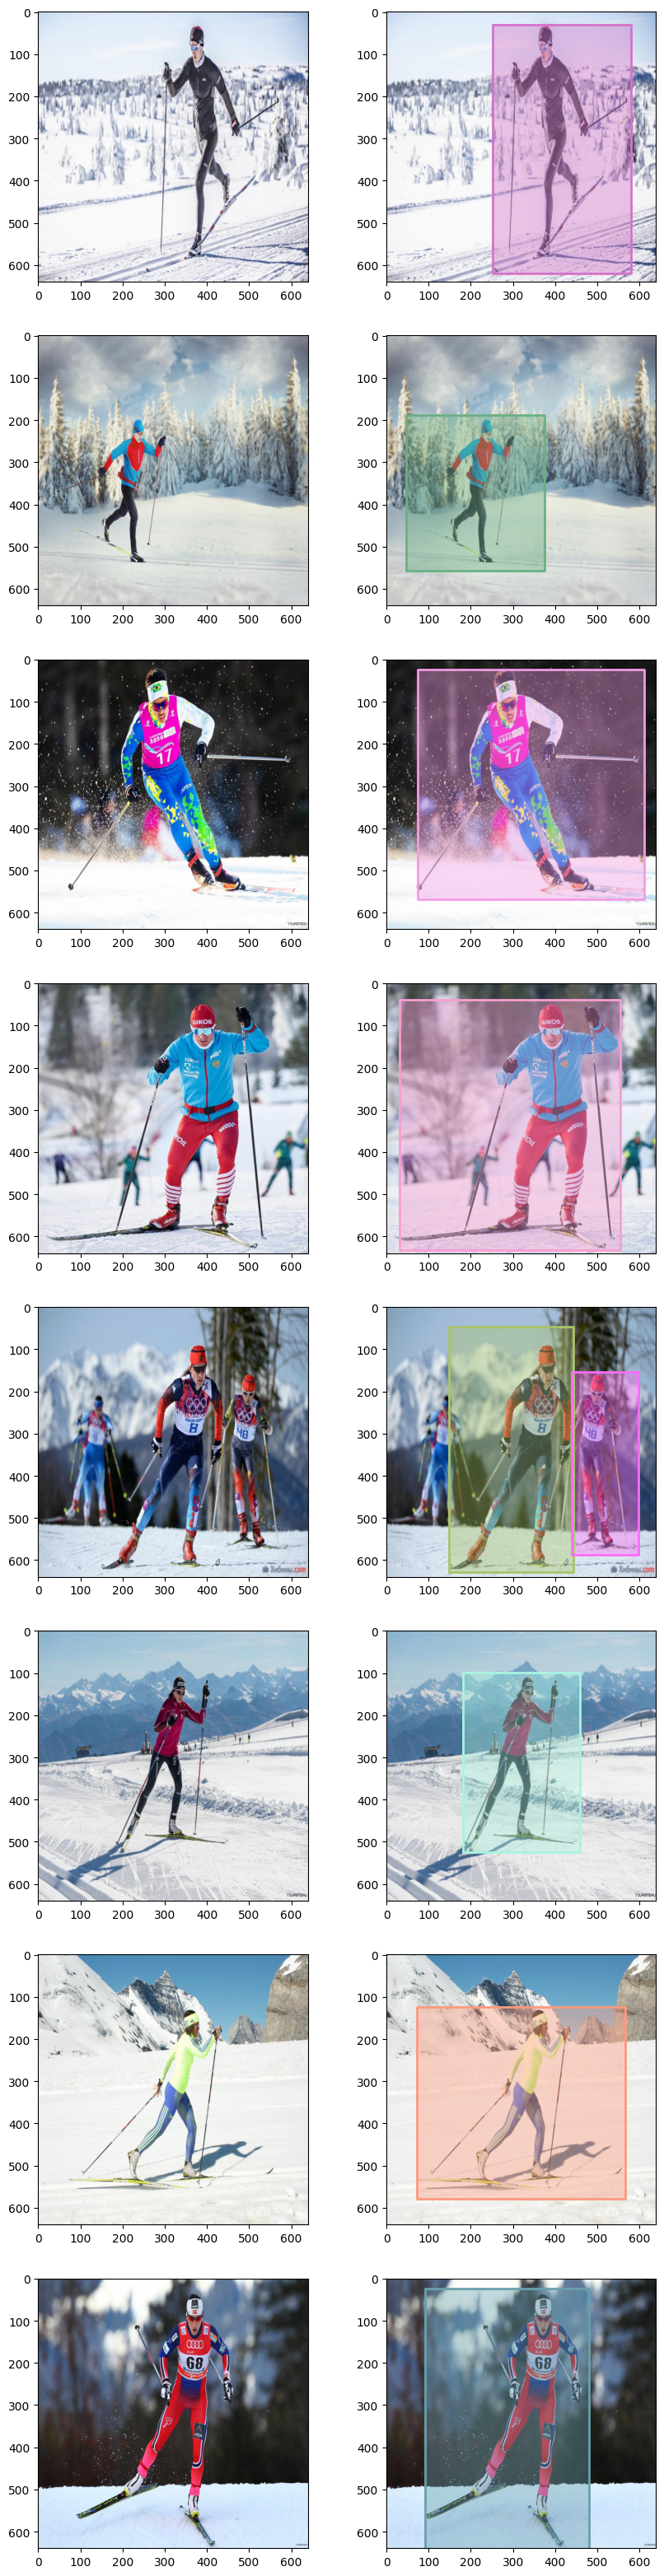

In [11]:
imgs = coco.loadImgs(imgIds[-25:-15])
_,axs = plt.subplots(len(imgs),2,figsize=(10,5 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)